<a href="https://colab.research.google.com/github/wojtek840919/data-science-bootcamp/blob/main/01_wprowadzenie/09_regresja_wielomianowa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import plotly.graph_objects as go
import numpy as np
import pandas as pd
import plotly.express as px

y_true = 100 + 20 * np.random.randn(50)
print(y_true)

y_pred = y_true + 10 * np.random.randn(50)
print(y_pred)


[106.5937071  136.47845018  80.37305058 110.948183   122.83101734
  89.65329471  74.10737877 107.37486213 124.6571824   78.72149474
 130.76155665 141.66430113  86.5256048   84.45556158  58.13579736
 114.27666226 115.53416059 120.70526755 125.72348781 101.7504344
 126.39973006 138.2145997   95.14198321  80.43927184 115.59141097
  76.29215556 129.67722807 122.88502322 113.88523297  76.59979184
  95.87917504  74.90318477 117.55020302 112.85039665  94.29969814
  88.50350022  99.22775869  91.76741042 117.34088118 109.52185215
  98.53937962  88.17040597 128.69947661  74.0242463  130.05881067
  77.41445926  97.00297519  97.8260457  104.67198019 111.85458302]
[106.08208346 142.12931149  61.76544098  96.12731206 129.54160661
  95.98246668  88.3717467  107.38003903 121.89063946  63.43588221
 135.7237159  136.75703882  84.45787283  85.21017613  85.32021656
 111.61699722 121.89278103 106.56993635 135.93514416  92.83680061
 109.95072169 144.95829896 107.45381568  77.61961583 131.20870271
  88.52558

In [ ]:
results = pd.DataFrame({'y_true': y_true, 'y_pred': y_pred})
results.head()


,y_true,y_pred
0,112.174702,113.233298
1,106.228681,111.626871
2,128.925861,119.286602
3,72.132567,57.342874
4,90.086427,92.151339


In [ ]:

results['error'] = results['y_true'] -results['y_pred']
results.head()

,y_true,y_pred,error
0,112.174702,113.233298,-1.058596
1,106.228681,111.626871,-5.398189
2,128.925861,119.286602,9.639259
3,72.132567,57.342874,14.789693
4,90.086427,92.151339,-2.064911


In [ ]:
def plot_regression_results(y_true, y_pred):
    results = pd.DataFrame({'y_true': y_true, 'y_pred': y_pred})
    min = results[['y_true', 'y_pred']].min().min()
    max = results[['y_true', 'y_pred']].max().max()

    

    fig=go.Figure(data=[go.Scatter(x=results['y_true'], y=results['y_pred'], mode='markers'),
                    go.Scatter(x=[min, max], y=[min, max])],
              layout=go.Layout(showlegend=False, width=800, height=500,
                                xaxis_title='y_true',
                               yaxis_title='y_pred',
                               title='Regression Results'))
    fig.show()
plot_regression_results(y_true, y_pred)

In [ ]:
y_true = 100 + 20 * np.random.randn(1000)
y_pred = y_true + 10 * np.random.randn(1000)
results = pd.DataFrame({'y_true': y_true, 'y_pred': y_pred})
results['error'] = results['y_true'] -results['y_pred']
px.histogram(results, x='error', nbins=50, width=800)

In [ ]:
def mean_absolute_error(y_true, y_pred):
    return abs(y_true-y_pred).sum() / len(y_true)
mean_absolute_error(y_true, y_pred)

8.122133088022562

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_true, y_pred)

8.122133088022562

In [ ]:
def mean_squared_error(y_true, y_pred):
    return ((y_true-y_pred)**2).sum() / len(y_true)
mean_squared_error(y_true, y_pred)

100.9469363461055

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_true, y_pred)

100.9469363461055

In [ ]:
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(((y_true-y_pred)**2).sum() / len(y_true))
root_mean_squared_error(y_true, y_pred)

10.047235258821479

In [ ]:
np.sqrt(mean_squared_error(y_true, y_pred))

10.047235258821479

In [ ]:
from sklearn.metrics import max_error
max_error(y_true, y_pred)

30.245279053508327

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_true, y_pred)

0.7414217124550431

In [1]:
import sklearn

In [ ]:
# # w0 -intercept_, w1...wn -coef_, model uczy się dobierać wagi żeby mean_squared_error był min
# # w0 -punkt przeciecia z osią y, w1 -współczynnik nachylenia
# # y=w0+ w1xX1
# # y=w0+ w1xX1 + w2xX2
# Y=XW, X=(1,X1,...Xn), W=(w0, w1, w2...w pionie) można mnożyć bo 5 kolumn w X zgadza się z 5 wierszami w W i wychodzi macierż 1x1

In [6]:
X=np.arange(0,50,0.5)
noise=10*np.random.randn(100) 
y=2*X+100+noise #jak damy X do potęgi to regresja liniowa nie znajdzie zastosowania, zbyt duży rozrzut danych
X=X.reshape(-1,1)

print('Rozmiar X:',X.shape)
print('Rozmiar y:',y.shape)

Rozmiar X: (100, 1)
Rozmiar y: (100,)


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
# stratify=y, parametr równy podział według liczności w różnych klasasach (np. 10% pozytywne to 10% wpada próbek do tej klasy) 

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (75, 1)
X_test shape: (25, 1)
y_train shape: (75,)
y_test shape: (25,)


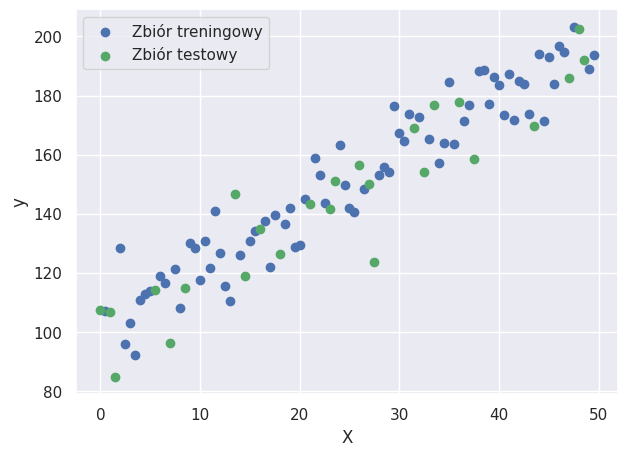

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

plt.figure(figsize=(7, 5))
plt.scatter(X_train, y_train, c='b', label='Zbiór treningowy')
plt.scatter(X_test, y_test, c='g', label='Zbiór testowy')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()


In [21]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X_train, y_train)

print(lin_reg.coef_)
print(lin_reg.intercept_)

[1.87473994]
102.9470023260345


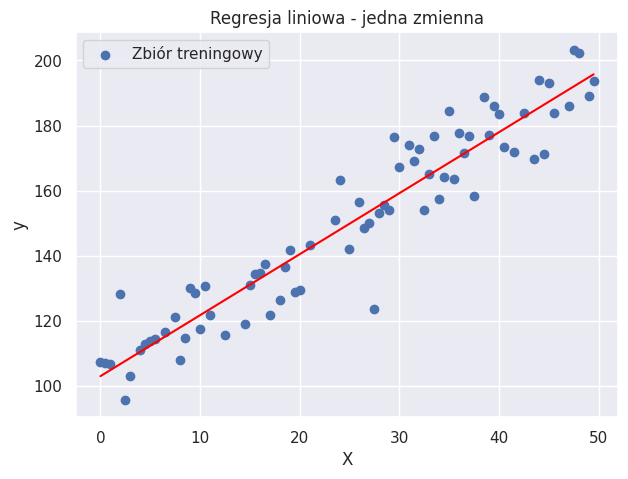

In [25]:
plt.figure(figsize=(7, 5))
plt.title('Regresja liniowa - jedna zmienna')
plt.scatter(X_train, y_train, c='b', label='Zbiór treningowy')
plt.plot(X,lin_reg.intercept_+lin_reg.coef_[0]*X, c='red')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

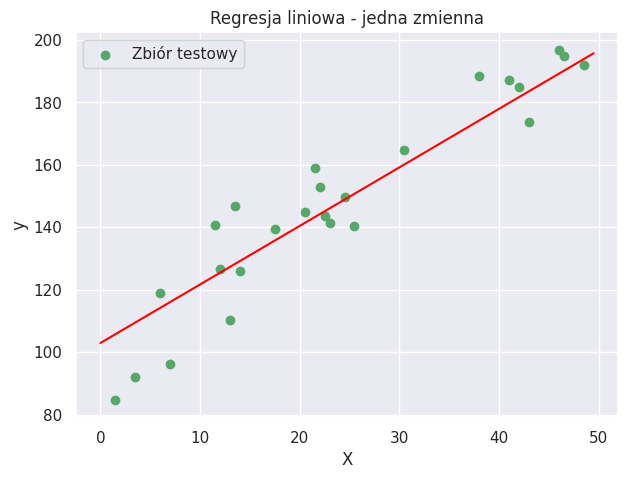

In [24]:
y_pred=lin_reg.predict(X_test)
plt.figure(figsize=(7, 5))
plt.title('Regresja liniowa - jedna zmienna')
plt.scatter(X_test, y_test, c='g', label='Zbiór testowy')
plt.plot(X,lin_reg.intercept_+lin_reg.coef_[0]*X, c='red')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

In [26]:
lin_reg.score(X_test, y_test)
# współczynnik determinacji, r2 score

0.880814226678246

In [27]:
lin_reg.score?

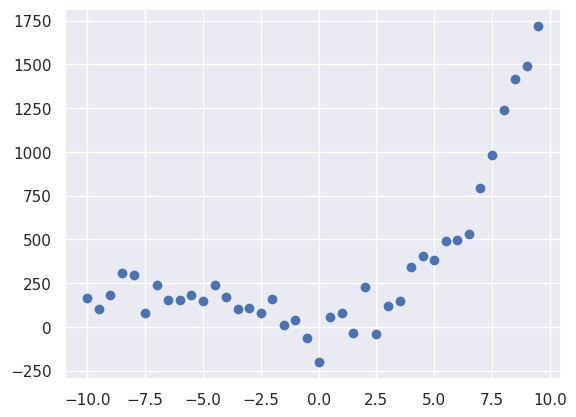

In [28]:
np.random.seed(0)
X=np.arange(-10,10,0.5)
noise=80*np.random.randn(40)
y=X**3+10*X**2-2*X+3+noise
X=X.reshape(40,1)
_=plt.scatter(X,y)


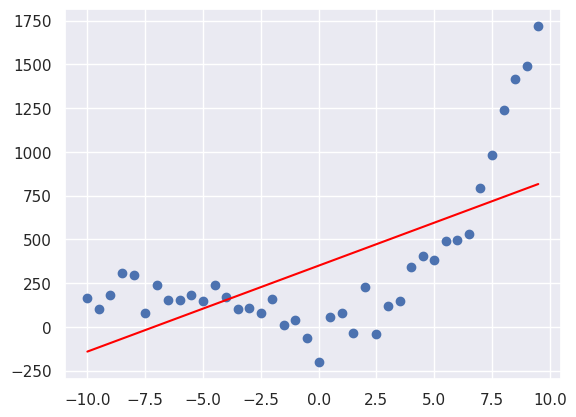

In [29]:
regressor=LinearRegression()
regressor.fit(X, y)
y_pred=regressor.predict(X)

plt.scatter(X,y)
_=plt.plot(X, y_pred, c='red')


In [32]:
from sklearn.metrics import r2_score
r2_score(y, y_pred) #model niedouczony -underfitting

0.4188588930184517

In [33]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2)
X_poly=poly.fit_transform(X)
X_poly

array([[  1.  , -10.  , 100.  ],
       [  1.  ,  -9.5 ,  90.25],
       [  1.  ,  -9.  ,  81.  ],
       [  1.  ,  -8.5 ,  72.25],
       [  1.  ,  -8.  ,  64.  ],
       [  1.  ,  -7.5 ,  56.25],
       [  1.  ,  -7.  ,  49.  ],
       [  1.  ,  -6.5 ,  42.25],
       [  1.  ,  -6.  ,  36.  ],
       [  1.  ,  -5.5 ,  30.25],
       [  1.  ,  -5.  ,  25.  ],
       [  1.  ,  -4.5 ,  20.25],
       [  1.  ,  -4.  ,  16.  ],
       [  1.  ,  -3.5 ,  12.25],
       [  1.  ,  -3.  ,   9.  ],
       [  1.  ,  -2.5 ,   6.25],
       [  1.  ,  -2.  ,   4.  ],
       [  1.  ,  -1.5 ,   2.25],
       [  1.  ,  -1.  ,   1.  ],
       [  1.  ,  -0.5 ,   0.25],
       [  1.  ,   0.  ,   0.  ],
       [  1.  ,   0.5 ,   0.25],
       [  1.  ,   1.  ,   1.  ],
       [  1.  ,   1.5 ,   2.25],
       [  1.  ,   2.  ,   4.  ],
       [  1.  ,   2.5 ,   6.25],
       [  1.  ,   3.  ,   9.  ],
       [  1.  ,   3.5 ,  12.25],
       [  1.  ,   4.  ,  16.  ],
       [  1.  ,   4.5 ,  20.25],
       [  

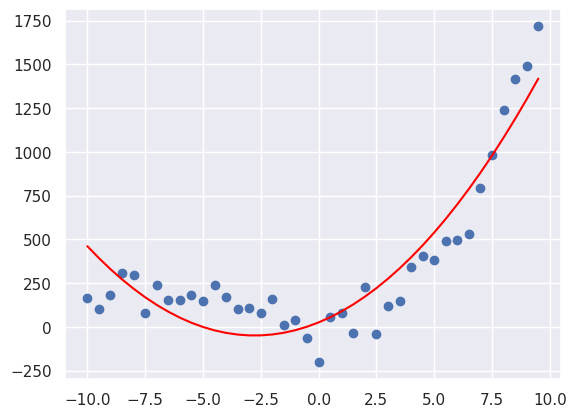

In [34]:
regressor_poly=LinearRegression()
regressor_poly.fit(X_poly, y)
y_pred=regressor_poly.predict(X_poly)

plt.scatter(X,y)
_=plt.plot(X, y_pred, c='red')

In [35]:
r2_score(y, y_pred)

0.8585563490323422

In [37]:
np.set_printoptions(suppress=True)
poly=PolynomialFeatures(degree=3)                        
X_poly=poly.fit_transform(X)
X_poly

array([[    1.   ,   -10.   ,   100.   , -1000.   ],
       [    1.   ,    -9.5  ,    90.25 ,  -857.375],
       [    1.   ,    -9.   ,    81.   ,  -729.   ],
       [    1.   ,    -8.5  ,    72.25 ,  -614.125],
       [    1.   ,    -8.   ,    64.   ,  -512.   ],
       [    1.   ,    -7.5  ,    56.25 ,  -421.875],
       [    1.   ,    -7.   ,    49.   ,  -343.   ],
       [    1.   ,    -6.5  ,    42.25 ,  -274.625],
       [    1.   ,    -6.   ,    36.   ,  -216.   ],
       [    1.   ,    -5.5  ,    30.25 ,  -166.375],
       [    1.   ,    -5.   ,    25.   ,  -125.   ],
       [    1.   ,    -4.5  ,    20.25 ,   -91.125],
       [    1.   ,    -4.   ,    16.   ,   -64.   ],
       [    1.   ,    -3.5  ,    12.25 ,   -42.875],
       [    1.   ,    -3.   ,     9.   ,   -27.   ],
       [    1.   ,    -2.5  ,     6.25 ,   -15.625],
       [    1.   ,    -2.   ,     4.   ,    -8.   ],
       [    1.   ,    -1.5  ,     2.25 ,    -3.375],
       [    1.   ,    -1.   ,     1.   ,    -1

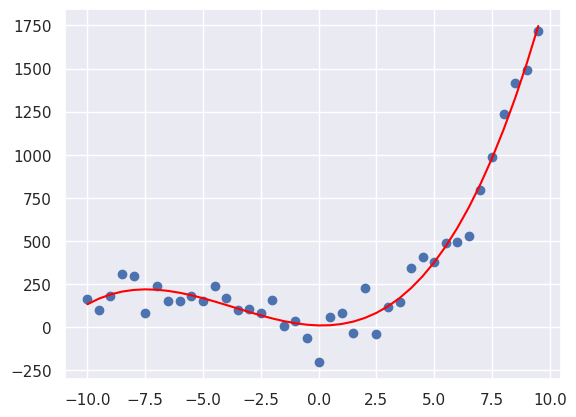

In [38]:
regressor_poly_3=LinearRegression()
regressor_poly_3.fit(X_poly, y)
y_pred=regressor_poly_3.predict(X_poly)

plt.scatter(X,y)
_=plt.plot(X, y_pred, c='red')

In [39]:
r2_score(y, y_pred)

0.966393722563614